In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np

%matplotlib inline

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
print(np.shape(imagenes), n_imagenes) # Hay 1797 digitos representados en imagenes 8x8

(1797, 8, 8) 1797


[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]


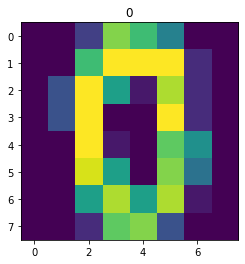

In [9]:
i=20 # este es uno de esos digitos
_ = plt.imshow(imagenes[i])
plt.title('{}'.format(target[i]))
print(imagenes[i])


In [4]:
# para poder correr PCA debemos "aplanar las imagenes"
data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
print(np.shape(data))

(1797, 64)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# Vamos a hacer un split training test
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.7)


In [7]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

3


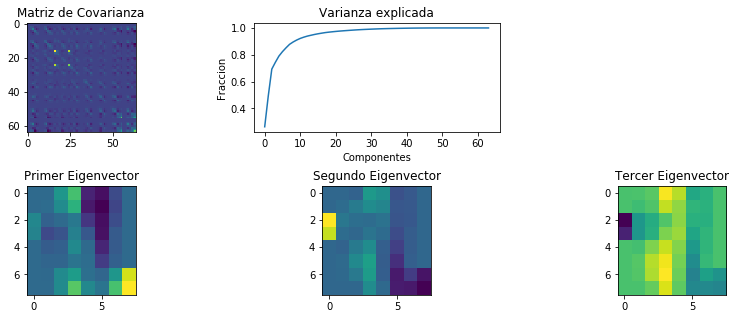

In [8]:
# Vamos a entrenar solamente con los digitos iguales a 1
numero = 1
dd = y_train==numero
cov = np.cov(x_train[dd].T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]

plt.figure(figsize=(15,5))
plt.subplot(2,3,1)
plt.title("Matriz de Covarianza")
plt.imshow(cov)

plt.subplot(2,3,2)
plt.title("Varianza explicada")
plt.plot(np.cumsum(valores)/np.sum(valores))
plt.xlabel("Componentes")
plt.ylabel("Fraccion")
max_comps = (np.count_nonzero((np.cumsum(valores)/np.sum(valores))<0.6))
print(max_comps+1) # Necesito este numero de componentes para tener al menos el 60 de la varianza.

plt.subplot(2,3,4)
plt.imshow(vectores[:,0].reshape(8,8))
plt.title('Primer Eigenvector')
plt.subplot(2,3,5)
plt.title('Segundo Eigenvector')
plt.imshow(vectores[:,1].reshape(8,8))
plt.subplot(2,3,6)
plt.title('Tercer Eigenvector')
plt.imshow(vectores[:,2].reshape(8,8))
plt.subplots_adjust(hspace=0.5)